<a href="https://colab.research.google.com/github/Nataliahfk/estadistica_python/blob/main/clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [79]:
import pandas as pd

In [80]:
datos = pd.read_csv('/content/prestacar.csv')

In [81]:
datos

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [82]:
X = datos.drop('moroso', axis=1)
y = datos['moroso']

In [83]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier()
modelo.fit(X, y)
modelo.score(X, y)

1.0

In [84]:
print(f'Precisión del modelo es: {modelo.score(X, y)}')

Precisión del modelo es: 1.0


### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [85]:
# separa en base de entranamieno y en base de prueba y luego entrenamiento y validación
from sklearn.model_selection import train_test_split

In [86]:
# test_size=0.15 tomar un 15 para entrenamiento, stratify=y que deje la misma cantidad de obs.en los 2 conjuntos que estoy separando
# ej: 10% de morosos en cada conjunto po eso pongo la y que es la variable dependiente
X, X_test, y, y_test = train_test_split(X,y, test_size=0.15, stratify=y, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X,y,stratify=y, random_state=5)

In [87]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)

print(f'Precisión del modelo con el conjunto de entrenamiento es: {modelo.score(X_train, y_train)}')
print(f'Precisión del modelo con el conjunto de validación es: {modelo.score(X_val, y_val)}')

Precisión del modelo con el conjunto de entrenamiento es: 1.0
Precisión del modelo con el conjunto de validación es: 0.8498388642104346


In [88]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train, y_train)

print(f'Precisión del modelo con el conjunto de entrenamiento es: {modelo.score(X_train, y_train)}')
print(f'Precisión del modelo con el conjunto de validación es: {modelo.score(X_val, y_val)}')

Precisión del modelo con el conjunto de entrenamiento es: 0.9205865272938444
Precisión del modelo con el conjunto de validación es: 0.9059315390645414


### Evaluando el modelo

In [89]:
from sklearn.metrics import confusion_matrix

In [90]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previsto)
print(matriz_confusion)

[[10362   117]
 [  963    39]]


In [91]:
from sklearn.metrics import ConfusionMatrixDisplay

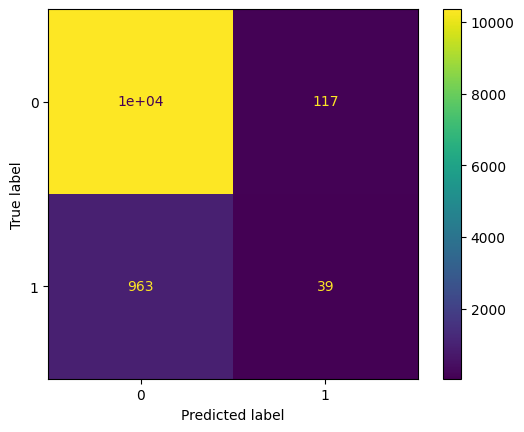

In [92]:
visualizacion = ConfusionMatrixDisplay(matriz_confusion)
visualizacion.plot();

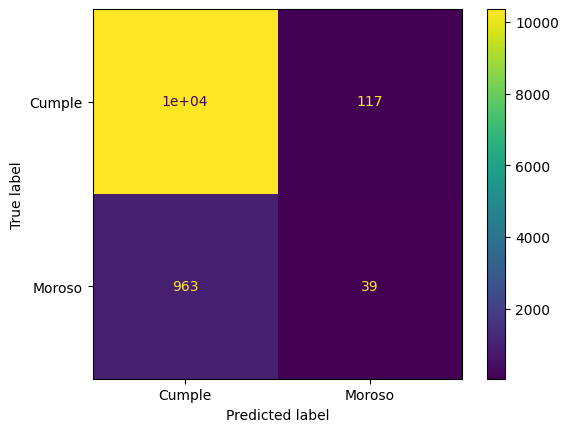

In [93]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['Cumple', 'Moroso'])
visualizacion.plot();

#predicción

**la matriz de confusión**

Para obtener una evaluación más completa del desempeño de modelos de clasificación, podemos utilizar una herramienta conocida como matriz de confusión. Esta matriz ofrece ventajas a la persona científica de datos, ya que permite entender cuántos errores y aciertos tiene las predicciones de un modelo. En lugar de una tasa de acierto general, la matriz es capaz de proporcionar información en una visualización para cada una de las categorías de la variable objetivo.

Piensa en un sistema de seguridad de un edificio que utiliza cámaras para identificar personas que entran. La "matriz de confusión" se vuelve valiosa, ya que permite verificar cuántas veces el sistema acertó al identificar correctamente a las personas autorizadas, cuántas veces acusó erróneamente a personas y cuántas veces dejó pasar a personas no autorizadas. Con estos números, es posible ajustar el sistema para minimizar falsos positivos y negativos, mejorando su precisión en la detección de visitantes.

En la representación general de una matriz de confusión, para más detalles analiza la imagen a continuación, las filas de la matriz corresponden a los valores reales de la base de datos, mientras que las columnas corresponden a los valores previstos por el modelo de clasificación. Las categorías de la variable objetivo están representadas por el valor 0 (ausencia del atributo), también llamado negativo, y por el valor 1 (presencia del atributo), también llamado positivo.

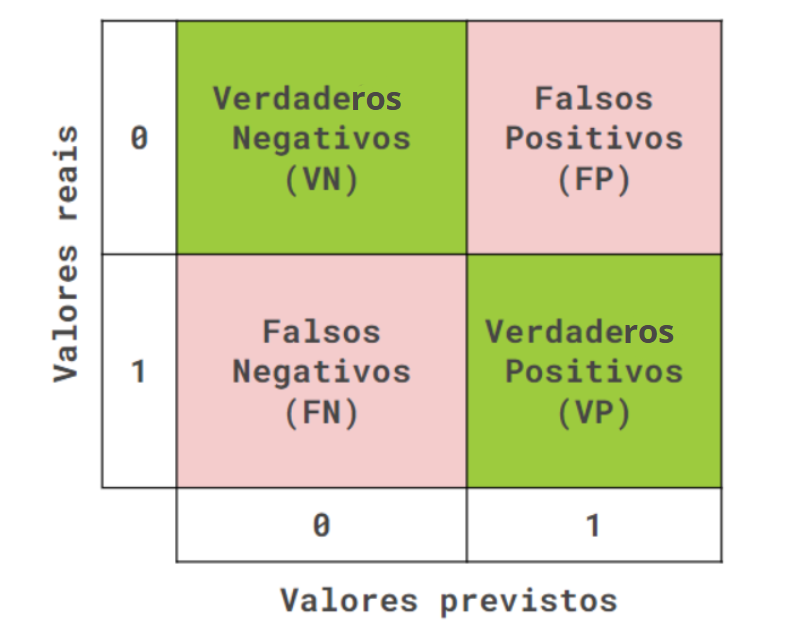

Cada elemento de la matriz está identificado por un nombre de acuerdo con la intersección entre la predicción y el valor real. La diagonal principal de la matriz, que está destacada por el color verde, representa los elementos que tienen la predicción igual al valor real, por lo tanto son los aciertos del modelo. Por otro lado, la diagonal secundaria, que está destacada por el color rojo, representa los elementos con predicciones diferentes del valor real, por lo tanto son los errores del modelo. La descripción de cada uno de los elementos es la siguiente:

- Verdaderos Negativos (VN): Cuando el valor real es 0 y la predicción también es 0. Indica que el modelo clasificó correctamente los valores de la clase negativa.
- Falsos Positivos (FP): Cuando el valor real es 0 y la predicción es 1. Indica que el modelo clasificó erróneamente un elemento de la clase negativa como si fuera de la clase positiva.
- Falsos Negativos (FN): Cuando el valor real es 1 y la predicción es 0. Indica que el modelo clasificó erróneamente un elemento de la clase positiva como si fuera de la clase negativa.
- Verdaderos Positivos (VP): Cuando el valor real es 1 y la predicción también es 1. Indica que el modelo clasificó correctamente los valores de la clase positiva.

Estos valores son muy útiles para un análisis más profundo del modelo de clasificación. Esto permite identificar las capacidades y limitaciones de la predicción, si hay un equilibrio entre los aciertos y errores o si el resultado está sesgado hacia una clase en detrimento de la otra. Con esto, es evidente que la matriz de confusión es una herramienta mucho más completa que la métrica de precisión, que representa solo el porcentaje de aciertos del modelo, sin considerar las clases de manera aislada.

Utilizamos durante la clase el algoritmo de árbol de decisión, pero la biblioteca Scikit-Learn tiene varios otros métodos de clasificación que pueden ser utilizados en nuestro proyecto. Como desafío, utiliza el algoritmo Random Forest para crear un modelo y evaluar el desempeño con la precisión y la matriz de confusión, y compara los resultados con el resultado del árbol de decisión.

In [94]:
from sklearn.ensemble import RandomForestClassifier

Ahora que hemos importado el algoritmo, solo necesitamos instanciar el RandomForestClassifier en una variable y utilizar el parámetro max_depth = 10 así como hicimos con el árbol de decisión. Esto evitará que el modelo se ajuste demasiado a los datos de entrenamiento. Después de eso, podemos ajustar el modelo con datos de entrenamiento y verificar el resultado de la precisión:

In [95]:
modelo_rf = RandomForestClassifier(max_depth = 10)
modelo_rf.fit(X_train, y_train)

print(f'Precisión de entrenamiento: {modelo_rf.score(X_train, y_train)}')
print(f'Precisión de validación: {modelo_rf.score(X_val, y_val)}')

Precisión de entrenamiento: 0.915534262485482
Precisión de validación: 0.9128124727811167


Este resultado muestra que el RandomForest tuvo una precisión mejor que el árbol de decisión, indicando que el modelo tiene una tasa de aciertos general mejor.

Para completar, podemos generar una matriz de confusión a partir del modelo y verificar la cantidad de aciertos y errores para cada clase. Podemos crear la matriz con el siguiente código:

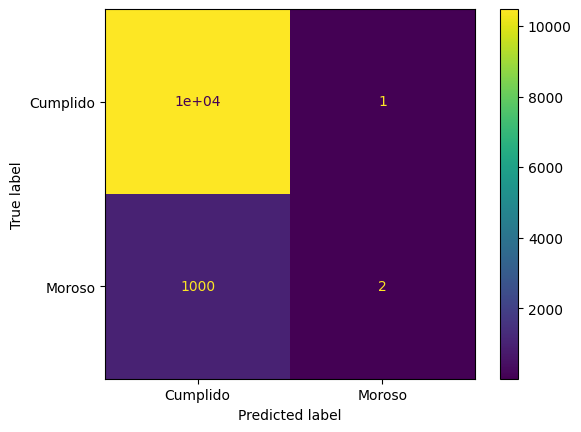

In [96]:
y_previsto_rf = modelo_rf.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previsto_rf)
visualizacion = ConfusionMatrixDisplay(confusion_matrix= matriz_confusion,
                                      display_labels = ['Cumplido', 'Moroso'])
visualizacion.plot();

## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previsto)
print(matriz_confusion)

[[10362   117]
 [  963    39]]


In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [100]:
print(f'Exactitud (accuracy): {accuracy_score(y_val, y_previsto)}')
print(f'Precision: {precision_score(y_val, y_previsto)}')
print(f'Sensibilidad (recall): {recall_score(y_val, y_previsto)}')

Exactitud (accuracy): 0.9059315390645414
Precision: 0.25
Sensibilidad (recall): 0.038922155688622756


El Recalll Error Tipo 2 es lo que debemos bajar al máximo


In [101]:
print(f'El F1-score del modelo es: {f1_score(y_val, y_previsto)}')

El F1-score del modelo es: 0.06735751295336788


El F1 penaliza el modelo. Mientras más lejos de 1 el modelo se está desempeñando muy mal.

Evaluar de manera adecuada el desempeño de un modelo de machine learning es esencial para asegurar que el modelo está resolviendo el problema de negocio que necesita ser solucionado. Existen diversas métricas que pueden ser utilizadas para evaluar el desempeño de los modelos de clasificación, cada una de ellas tiene ventajas y limitaciones. Estas métricas se calculan a partir de la comparación entre las clasificaciones realizadas por el modelo y los valores reales de la base de datos. Por lo tanto, pueden ser extraídas a partir de una matriz de confusión. Las principales métricas de clasificación son:

**Exactitud**

Es la métrica más común y básica en problemas de clasificación. Se utiliza para medir la proporción de datos previstos correctamente por el modelo en relación al total de los datos. Esta métrica es útil cuando las clases de la variable objetivo están balanceadas, es decir, cuando hay una cantidad equilibrada de datos para cada clase y una importancia equivalente de clasificación entre las categorías. Como ejemplo de utilización, tenemos el reconocimiento de dígitos manuscritos. Podemos utilizar imágenes de caracteres de letras y números para entrenar un modelo de clasificación para identificar correctamente la escritura. Como cada letra o número no tiene una importancia mayor que los demás, la exactitud se convierte en una buena métrica para medir la capacidad del modelo en clasificar correctamente los dígitos.

A continuación, podemos analizar el cálculo de la exactitud a partir de la matriz de confusión. Se calcula sumando los aciertos del modelo (VN + VP) y dividiendo por todos los aciertos y errores (VP + VN + FP + FN).

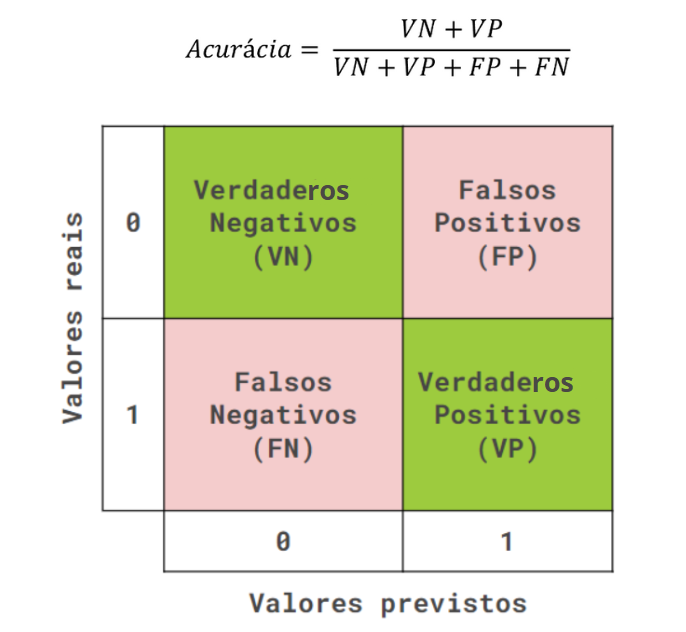

**Recuperación (recall)**

Mide la proporción de datos positivos que fueron correctamente identificados por el modelo, es decir, revela la capacidad del modelo en evitar la clasificación incorrecta de datos positivos como negativos. Se usa cuando el riesgo o costo de clasificar falsos negativos es alto. Por ejemplo, en casos de diagnóstico de enfermedades graves, donde es fundamental detectar correctamente la presencia de la enfermedad.

A continuación, podemos constatar el cálculo del recall a partir de la matriz de confusión. El recall solo toma en cuenta los valores positivos reales, es decir, los valores de la segunda fila de la matriz. Se calcula a partir de la división entre Verdaderos Positivos (VP) y la suma de todos los positivos reales (VP + FN):

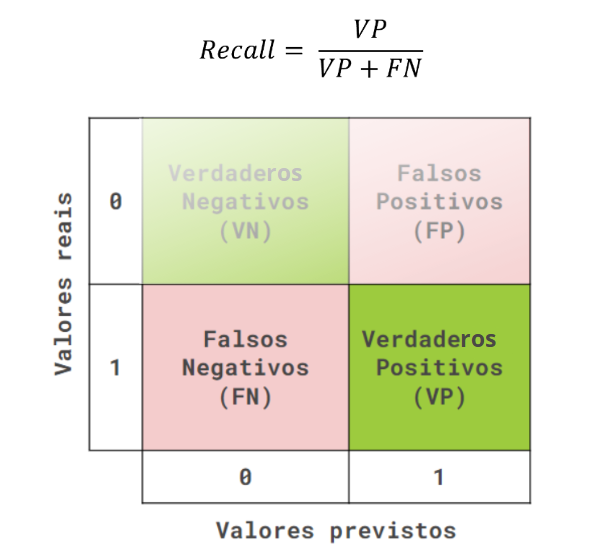

**Precisión**

Mide la proporción de datos clasificados como positivos que son realmente positivos, es decir, revela la capacidad del modelo en evitar la clasificación incorrecta de datos negativos como positivos. Se usa cuando el riesgo o costo de clasificar falsos positivos es alto, por ejemplo, en casos de selección de acciones en el mercado financiero, donde lo importante es seleccionar acciones que tengan gran probabilidad de retorno, reduciendo la cantidad de acciones malas (falsos positivos) incluso si otras buenas acciones no han sido detectadas por el modelo (falso negativo). La precisión también es importante en el ejemplo de detección de enfermedades, donde queremos evitar que pacientes sanos sean erróneamente clasificados como enfermos.

A continuación, podemos analizar el cálculo de la precisión a partir de la matriz de confusión. La precisión solo toma en cuenta los valores positivos previstos por el modelo, es decir, los valores de la segunda columna de la matriz. Se calcula a partir de la división entre Verdaderos Positivos (VP) y la suma de todos los positivos previstos (VP + FP):

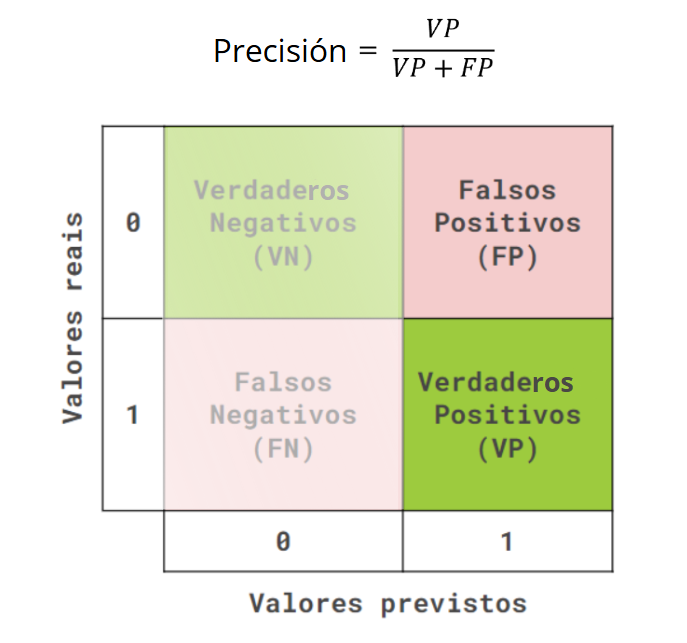

**F1-Score**

Proporciona un equilibrio entre el recall y la precisión, siendo útil cuando las clases de la variable objetivo están desbalanceadas, es decir, cuando hay una cantidad de datos muy diferente para cada clase. Además, es aplicable cuando el riesgo o costo de falsos positivos y de falsos negativos es alto simultáneamente. En casos de detección de tumores en pacientes, es necesario tener un equilibrio entre evitar errores en la detección de tumores cuando la persona realmente los tiene y evitar errores al informar que una persona tiene un tumor cuando en realidad no lo tiene.

El cálculo del F1-Score se realiza a partir de la media armónica entre la precisión y el recall. Por lo tanto, equivale a 2 veces la precisión por el recall, dividido por la suma entre la precisión y el recall:

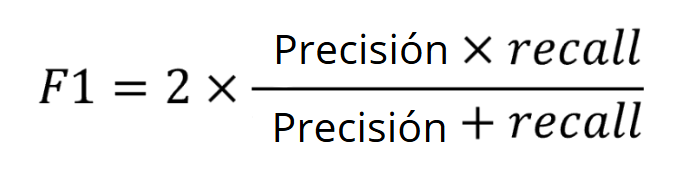

La elección de la métrica de clasificación adecuada depende del problema que se está resolviendo y de cada escenario. En los casos en que las clases están balanceadas y tienen importancia similar, la exactitud puede ser una buena métrica inicial. Sin embargo, cuando las clases están desequilibradas o los errores tienen costos diferentes, métricas como precisión, recall y F1-score son más indicadas.

### Curva ROC

In [102]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




In [103]:
from sklearn.metrics import RocCurveDisplay

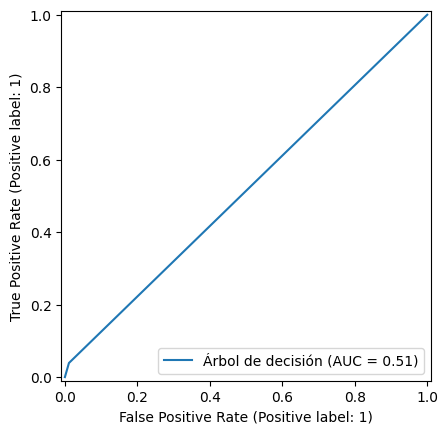

In [104]:
RocCurveDisplay.from_predictions(y_val,y_previsto, name='Árbol de decisión');

In [105]:
from sklearn.metrics import roc_auc_score

In [106]:
print(f'El áre bajo la curva es : {roc_auc_score(y_val,y_previsto)}')

El áre bajo la curva es : 0.5138784840853649


### Curva de  precisión x sensibilidad

In [107]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


In [108]:
from sklearn.metrics import PrecisionRecallDisplay

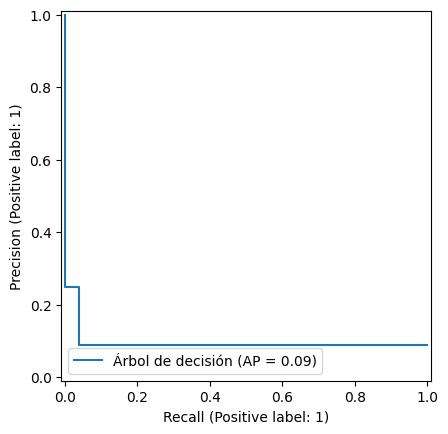

In [109]:
PrecisionRecallDisplay.from_predictions(y_val,y_previsto, name='Árbol de decisión');

In [110]:
from sklearn.metrics import average_precision_score

In [111]:
print(f'El score promedio de precision vs recall es : {average_precision_score(y_val,y_previsto)}')

El score promedio de precision vs recall es : 0.09360824992293959


La curva de precisión x recall es mejor para evaluar datos que tienen clases más desbalanceadas.

### Informe de métricas

In [112]:
from sklearn.metrics import classification_report

In [113]:
print(classification_report(y_val,y_previsto))

# Cumple es 0 , Morosos es 1

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.51      0.51     11481
weighted avg       0.86      0.91      0.87     11481



## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [114]:
from sklearn.model_selection import KFold, cross_validate

In [115]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5) # shuffle=True para que se mezcle
cv_resultados = cross_validate(modelo,X,y,cv=kf)
cv_resultados

{'fit_time': array([0.24074936, 0.24578857, 0.23817754, 0.22746706, 0.22920036]),
 'score_time': array([0.00392008, 0.00381684, 0.00332189, 0.00334334, 0.00334358]),
 'test_score': array([0.91311922, 0.90722997, 0.90755662, 0.91332753, 0.89939024])}

In [116]:
cv_resultados['test_score'] # test_score' muestra los resultados para las validaciones en los distintos escalones

array([0.91311922, 0.90722997, 0.90755662, 0.91332753, 0.89939024])

In [117]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de la exactitud es: {promedio} y el desvio es: {desvio_std}')
print(f'El intervalo de confianza es: {promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}')

El promedio de la exactitud es: 0.9081247143027851 y el desvio es: 0.005087800691399801
El intervalo de confianza es: 0.8979491129199855,0.9183003156855847


### Validación cruzada con sensibilidad (Recall)

In [118]:
def intervalo_confianza(resultado):
  promedio = cv_resultados['test_score'].mean()
  desvio_std = cv_resultados['test_score'].std()
  return print(f'El intervalo de confianza es: {promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}')

In [119]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5) # shuffle=True para que se mezcle
cv_resultados = cross_validate(modelo,X,y,cv=kf,scoring='recall')
cv_resultados

{'fit_time': array([0.23441792, 0.23578525, 0.22366881, 0.22903252, 0.22998071]),
 'score_time': array([0.00599527, 0.0057478 , 0.00566769, 0.00574994, 0.00574183]),
 'test_score': array([0.02642008, 0.01980198, 0.0196802 , 0.01697128, 0.02312139])}

In [120]:
intervalo_confianza(cv_resultados)

El intervalo de confianza es: 0.014682096326808518,0.02771587283992378


Es siempre importante analizar el problema de negocio antes de evaluar un modelo de clasificación, para que se elija la métrica más adecuada. En nuestro proyecto, estamos clasificando clientes morosos de una agencia de alquiler de vehículos e identificamos que la métrica más relevante es el recall, que busca minimizar la cantidad de personas morosas que son clasificadas como cumplidoras.

Para obtener un resultado completo de las métricas en la validación cruzada así como el classification_report, es necesario utilizar el método cross_validate e informar en el parámetro scoring las métricas a evaluar.

Como desafío, construye un código para generar el intervalo de confianza para cada una de las métricas utilizando la validación cruzada:

- Exactitud
- Recall
- Precisión
- F1-score

Para solucionar el desafío, podemos explorar la documentación y darnos cuenta de que podemos utilizar una lista de métricas en el parámetro scoring. De esta manera, vamos a utilizar el código de la clase para validar el modelo con KFold, pero usando todas las métricas de evaluación de una sola vez:

In [121]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, X, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados

{'fit_time': array([0.24126434, 0.22330379, 0.22636151, 0.25020194, 0.32703209]),
 'score_time': array([0.01265025, 0.01219511, 0.01185155, 0.01921868, 0.01745605]),
 'test_accuracy': array([0.91301034, 0.90788328, 0.90777439, 0.91267422, 0.89939024]),
 'test_recall': array([0.02906209, 0.01856436, 0.0196802 , 0.01174935, 0.02543353]),
 'test_precision': array([0.25581395, 0.22058824, 0.24242424, 0.16666667, 0.21359223]),
 'test_f1': array([0.05219454, 0.03424658, 0.03640501, 0.02195122, 0.04545455])}

El resultado obtenido es un diccionario con los tiempos de ajuste de los modelos, tiempos de cálculo de las métricas y los resultados de cada una de las métricas para cada uno de los 5 modelos del KFold:

Para generar el intervalo de confianza para las métricas, podemos calcular la media y la desviación estándar de cada métrica y utilizar la función print() para presentar el resultado en pantalla. De este modo, podemos construir una función para crear este informe, usando un for para recorrer cada una de las claves del diccionario que acceden a las métricas:

In [122]:
def informe_metricas(resultados):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultados[metrica].mean()
        desvio_estandar = resultados[metrica].std()
        print(f'Intervalo de confianza({metrica}): [{media-2*desvio_estandar}, {min(media+2*desvio_estandar, 1)}]')

In [123]:
informe_metricas(cv_resultados)

Intervalo de confianza(test_accuracy): [0.8983062922786378, 0.9179866950757634]
Intervalo de confianza(test_recall): [0.00896978135648593, 0.03282602412108186]
Intervalo de confianza(test_precision): [0.15868659238910793, 0.2809475399641351]
Intervalo de confianza(test_f1): [0.017435079144121478, 0.058665676573972377]


### Estratificando los datos

In [124]:
datos.moroso.value_counts()

,count
moroso,
0,49309
1,4716


In [125]:
from sklearn.model_selection import StratifiedKFold

In [126]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, X, y, cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados

{'fit_time': array([0.31680775, 0.31647158, 0.34391785, 0.31820464, 0.32325673]),
 'score_time': array([0.01811409, 0.01878667, 0.0171144 , 0.02019691, 0.01922178]),
 'test_accuracy': array([0.90397387, 0.90712108, 0.9070122 , 0.91027875, 0.90722997]),
 'test_recall': array([0.03491272, 0.02621723, 0.03117207, 0.02119701, 0.02743142]),
 'test_precision': array([0.20588235, 0.22340426, 0.24509804, 0.30357143, 0.23404255]),
 'test_f1': array([0.05970149, 0.04692737, 0.05530973, 0.03962704, 0.04910714])}

In [127]:
informe_metricas(cv_resultados)

Intervalo de confianza(test_accuracy): [0.9031332369295325, 0.9111131056719294]
Intervalo de confianza(test_recall): [0.018914333378189294, 0.03745784479062089]
Intervalo de confianza(test_precision): [0.17598619187433778, 0.30881325982123403]
Intervalo de confianza(test_f1): [0.03627646916781299, 0.0639926443667655]


## <font color='dark'>Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

In [128]:
datos.moroso.value_counts(normalize=True)

,proportion
moroso,
0,0.912707
1,0.087293


La proporcion esta desbalanceada. Los que pagan son el p1% y los morosos son el 8%.

Identifica la clase minoritaria (ejemplo: clientes que cancelaron → 1).

Genera nuevas muestras sintéticas de esa clase (no simples duplicados, sino ejemplos creados interpolando entre los ya existentes).

Devuelve:

- X_resampled → las variables independientes (explicativas) balanceadas.

- y_resampled → la variable objetivo balanceada.

In [129]:
from imblearn.over_sampling import SMOTE

In [130]:
over_sampling = SMOTE()
X_balanceado, y_balanceado = over_sampling.fit_resample(X, y)

In [131]:
y_balanceado.value_counts(normalize=True)

,proportion
moroso,
0,0.5
1,0.5


In [132]:
y_balanceado.value_counts()

,count
moroso,
0,41912
1,41912


In [133]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, X_balanceado, y_balanceado, cv=skf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.59683776, 0.50121951, 0.51668   , 0.50652122, 0.51388502]),
 'score_time': array([0.00731039, 0.00713563, 0.00724459, 0.00700521, 0.00707173]),
 'test_score': array([0.74492961, 0.71450728, 0.73637123, 0.72802099, 0.72655691])}

In [134]:
intervalo_confianza(cv_resultados)

El intervalo de confianza es: 0.7096958039421234,0.7504586034917896


En problemas de clasificación, podemos encontrarnos con bases de datos en las que la variable objetivo contenga clases muy desbalanceadas, es decir, categorías con frecuencias muy diferentes. Al entrenar un modelo con la variable desbalanceada, puede ser que el patrón de los datos para la clase dominante sobresalga en relación a la clase con menor frecuencia, generando un modelo con un desempeño muy bajo para clasificar la clase de menor frecuencia.

Para sortear estos problemas generados por la base de datos desbalanceada, podemos recurrir a dos soluciones que consisten en equilibrar los datos de la variable objetivo: undersampling y oversampling. Estas estrategias son útiles para que el modelo pueda comprender mejor el patrón de los datos, pero es importante destacar que también tienen desventajas y consideraciones que debemos analizar antes de utilizarlas.

**Oversampling**

La estrategia de oversampling consiste en aumentar la cantidad de datos de la clase que tiene menor frecuencia hasta que tenga la misma cantidad que la clase de mayor frecuencia. De esta manera, el modelo prestará más atención al patrón de los datos de la clase que tenía menor frecuencia al principio y podrá diferenciar mejor las dos clases.

Para aumentar la cantidad de datos necesitamos generar nuevos registros en la base de datos. Es posible utilizar un oversampling aleatorio para duplicar registros de manera aleatoria o usar una técnica como SMOTE para generar datos sintéticos con un patrón cercano a los datos existentes. La desventaja de esta estrategia es la posibilidad de sobreajuste del modelo, especialmente al utilizar el oversampling aleatorio. En este caso, el modelo puede especializarse demasiado en el patrón de los datos que son muy parecidos o idénticos, ya que son copiados o generados sintéticamente.

**Undersampling**

La estrategia de undersampling es contraria al oversampling y consiste en reducir la cantidad de datos de la clase que tiene mayor frecuencia hasta que tenga la misma cantidad que la clase de menor frecuencia. De esta forma, el modelo no prestará atención solo a los datos de mayor cantidad y podrá diferenciar mejor las dos clases.

Para reducir la cantidad de datos, necesitamos eliminar o borrar registros existentes. Es posible utilizar un undersampling aleatorio para seleccionar los registros que se mantendrán o usar técnicas que seleccionan o eliminan datos a partir de un patrón establecido. La principal desventaja de la estrategia de undersampling es la eliminación de datos que pueden ser muy importantes para la comprensión del problema, especialmente cuando esta eliminación se realiza sin ningún criterio, como es el caso del undersampling aleatorio.

Ambas estrategias son válidas para intentar mejorar el desempeño de un modelo de clasificación, pero debemos estar atentos al utilizarlas debido a los puntos negativos que son inherentes a cada uno de los métodos. En cualquier proyecto que utilice alguna de estas herramientas, se debe realizar un análisis para identificar si realmente ayudaron o perjudicaron el desempeño del modelo de clasificación.

La clasificación de datos desbalanceados puede convertirse en una tarea bastante desafiante, ya que el enfoque tradicional de entrenar un modelo utilizando estos datos a menudo lleva a resultados muy insatisfactorios, donde el modelo tiende a favorecer la clase con mayor cantidad de datos en detrimento de la otra.

Para abordar este tipo de situación, la biblioteca imbalanced-learn, abreviada como imblearn, ofrece diversas técnicas y herramientas con el objetivo de equilibrar la distribución de las categorías de la variable objetivo y mejorar el rendimiento de los modelos de machine learning. Las técnicas consisten en algoritmos de reamostrado de oversampling, undersampling y algoritmos que combinan ambas estrategias simultáneamente.

Algunos de los algoritmos de oversampling de la biblioteca:

- RandomOversampler
- SMOTE
- ADASYN
- KMeansSMOTE

Algunos de los algoritmos de undersampling de la biblioteca:

- RandomUnderSampler
- NearMiss
- ClusterCentroids
- TomekLinks

Algoritmos que combinan las dos técnicas de oversampling y undersampling:

- SMOTEENN
- SMOTETomek

Además de las técnicas de balanceo de datos, la biblioteca proporciona herramientas para la construcción de pipelines de datos, algoritmos de machine learning para datos desbalanceados y cálculos de métricas de rendimiento de modelos.

### Pipeline para validación

In [144]:
from imblearn.pipeline import Pipeline as imbpipeline

In [145]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arbol', modelo)])

In [146]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.57182932, 0.73431277, 0.79764438, 0.7904067 , 0.6543653 ]),
 'score_time': array([0.00691557, 0.00968456, 0.01128054, 0.00941133, 0.00661492]),
 'test_score': array([0.27930175, 0.26966292, 0.26309227, 0.2967581 , 0.22693267])}

In [147]:
intervalo_confianza(cv_resultados)

El intervalo de confianza es: 0.22098012770759096,0.3133189560437049


### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

In [141]:
from imblearn.under_sampling import NearMiss

In [142]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arbol', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring = 'recall')

In [143]:
intervalo_confianza(cv_resultados)

El intervalo de confianza es: 0.6246488764937828,0.6978600820711034


El desequilibrio de clases es un problema común en tareas de clasificación en machine learning, como diagnósticos médicos, detección de fraudes y detección de anomalías, donde la frecuencia de ocurrencia de un evento es muy baja en relación con el total. Una de las estrategias para abordar este problema de datos desequilibrados es el undersampling, que busca reducir el número de muestras de la clase con mayor frecuencia.

Entre los algoritmos de undersampling, podemos mencionar el NearMiss, que consiste en seleccionar muestras de la categoría en mayor cantidad que tienen un patrón cercano a la categoría con menor cantidad, con el fin de preservar información importante para la modelación del problema. Al utilizar un criterio de selección de las muestras, este método es mucho más recomendado que el uso de un undersampling puramente aleatorio, que puede eliminar información relevante de los datos.

Para seleccionar las muestras, este algoritmo utiliza un método conocido como vecino más cercano. Este método se aplica en 3 pasos:

- 1er paso: se calculan distancias entre todas las muestras de la clase con mayor frecuencia y de la clase con menor frecuencia.

- 2º paso: a continuación, para cada muestra de la clase de menor frecuencia, se seleccionan n muestras de la clase de mayor frecuencia; por defecto, este número es 3 y de ahí proviene el nombre de vecinos más cercanos. Se seleccionan 3 vecinos más cercanos para cada muestra de la clase de menor frecuencia.

- 3er paso: a partir de los elementos que fueron seleccionados, ocurre un nuevo proceso de selección para que quede con la misma cantidad de elementos de la clase de menor frecuencia. Esta selección final tiene 3 versiones diferentes:

NearMiss versión 1: se calcula un promedio entre las distancias de los 3 vecinos más cercanos de cada muestra de la clase de mayor frecuencia y se eligen aquellos que tengan la menor media de distancia.

NearMiss versión 2: se calcula un promedio entre las distancias de los 3 vecinos más lejanos de cada muestra de la clase de mayor frecuencia y se eligen aquellos que tengan la menor media de distancia.

NearMiss versión 3: se divide en dos etapas. Primero, para cada elemento de la clase de menor frecuencia, se eligen y almacenan M vecinos más cercanos, por defecto M también es de 3 vecinos. Luego se calcula el promedio de las distancias entre los elementos almacenados y los elementos de la clase de menor frecuencia y se eligen aquellos que tengan la mayor media de distancia.

### Probando el modelo

In [148]:
undersample = NearMiss(version=3)
x_balanceado, y_balanceado = undersample.fit_resample(X, y)

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



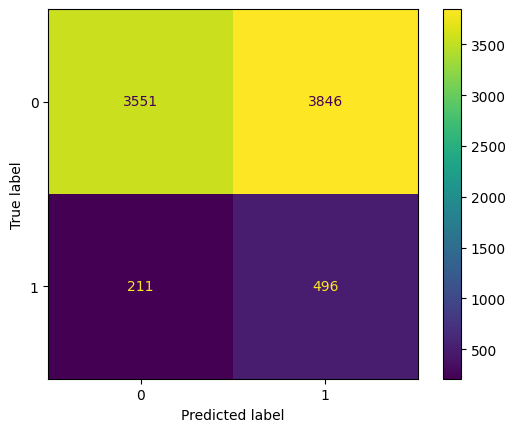

In [150]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);

Durante la clase, exploramos dos estrategias de balanceo de datos: oversampling y undersampling. En cada una de ellas utilizamos un algoritmo diferente, el SMOTE para generar nuevos datos sintéticos y el NearMiss para mantener datos que tienen un patrón cercano entre las clases.

Estos no son los únicos algoritmos existentes y el oversampling y undersampling no necesitan ser utilizados de manera aislada. Es posible combinar las dos estrategias en una sola para equilibrar los puntos negativos de cada una de ellas. Esto no quiere decir que esta estrategia sea más efectiva en todas las ocasiones, pero es una opción que puede ser explorada en los proyectos.

Como desafío, utiliza el algoritmo SMOTEENN, que combina el oversampling con SMOTE y el undersampling con el ENN (Edited Nearest Neighbours), para balancear los datos y observa los resultados obtenidos por el modelo usando el pipeline y la validación cruzada.

Como un consejo, revisa la documentación del método SMOTEENN a partir de este enlace para identificar cómo importar el método y cómo utilizarlo.

Como primer paso, vamos a importar el método SMOTEENN desde la sección combine de la biblioteca imblearn:

In [151]:
from imblearn.combine import SMOTEENN

Los pasos para utilizar el método con la validación cruzada son los mismos. Debemos instanciar el modelo y crear un pipeline con los pasos de balanceo de los datos y ajuste del modelo:

In [152]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('smoteenn', SMOTEENN()), ('arbol', modelo)])

Después de eso, podemos utilizar la validación cruzada con el StratifiedKFold para mantener la proporción en los datos y utilizar el método cross_validate con el pipeline, evaluando el rendimiento con la métrica recall y generando el intervalo de confianza de esa métrica:

In [155]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring = 'recall')
intervalo_confianza(cv_resultados)

El intervalo de confianza es: 0.2896796054329338,0.4297241324134614


El recall de este modelo estuvo alrededor de 0.28 a 0.42, un poco mejor que el resultado usando solamente el oversampling, pero peor que el resultado del undersampling. Por lo tanto, esta estrategia no fue tan eficiente para este caso, pero eso no significa que no pueda ser utilizada en otros proyectos.